Cite as: https://link.springer.com/chapter/10.1007/978-3-030-12450-2_29

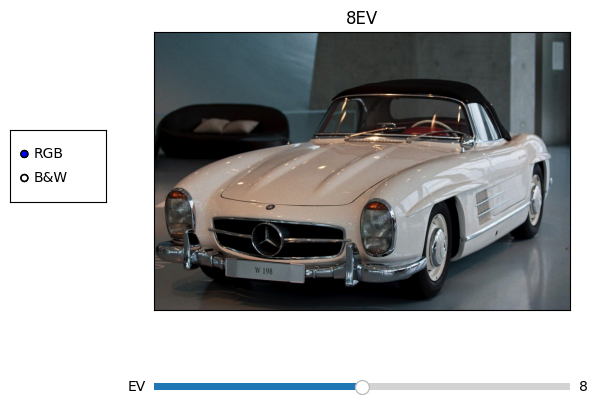

In [1]:

from cv2 import imread, cvtColor, COLOR_BGR2RGB as RGB, COLOR_BGR2GRAY as GRAY
from matplotlib.pyplot import subplots, subplots_adjust, axes, show
from matplotlib.widgets import Slider, RadioButtons
## https://matplotlib.org/3.2.1/gallery/widgets/slider_demo.html
from numpy.random import poisson
from auxiliary import displayImages as DI
from numpy import clip
from random import choice

''' Warning: Never ignore warnings... ;) '''
import warnings; warnings.filterwarnings('ignore')


# A handy shortcut...
DIH = lambda img, ttl = '', cmp = 'gray', shw = False: DI(img, ttl, cmp, shw)
## A simple emulation of Poisson-governed image generation
# GUI event handlers
def poissonimg(val):
    global fig, img
    λ = 2**(val - 8.0); imp = clip(poisson(img * λ)/λ, 0, 0xff).astype(int)
    DIH(imp, f'{val}EV')
    fig.canvas.draw_idle() # Forces image refresh

def scotophotopic(label):
    global img, mb, slEV
    img = cvtColor(imread(mb), RGB if label == 'RGB' else GRAY)
    poissonimg(slEV.val)

# GUI elements
fig, _ = subplots(); subplots_adjust(left = .25, bottom = .25)

axEV, axc = axes([.25, .1, .65, .03]), axes([.025, .5, .15, .15])
slEV = Slider(axEV, 'EV', 0.0, 16.0, valinit = 8.0, valstep = 1.0)
radio = RadioButtons(axc, ('RGB', 'B&W'), active = 0)
slEV.on_changed(poissonimg); radio.on_clicked(scotophotopic)

# Image re/de-generation
mb = f'MB{choice("ABCD")}.png'
img = cvtColor(imread(mb), RGB)

poissonimg(8)
show()